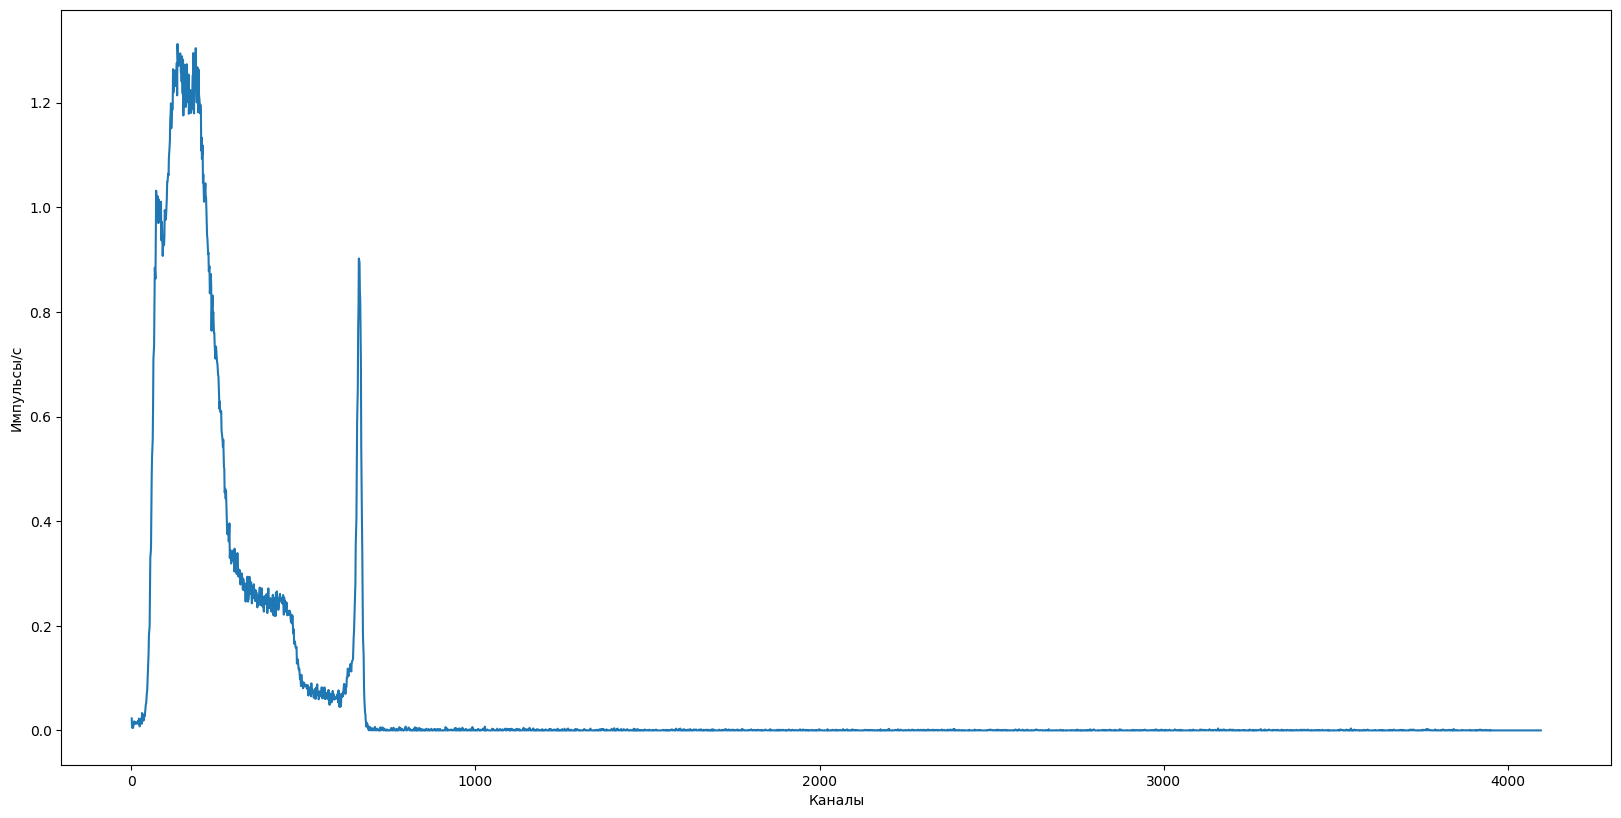

In [32]:
# чтение спектров и подготовка 

import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np

import os

directory = 'D:/1_Научная работа/Collimator_100_0_line' #
list_of_files = os.listdir(directory) #список файлов
bulls= [] # временный список
for i in list_of_files:
    with open(directory + '/'+ i, 'r') as f:
        tmp=f.readlines()
        bulls.append(tmp)

chanel=[] # список массивов каналов
for j in bulls:
    a = j[0].split(' ') # чтение живого времени
    t = a[3] 
    t=t.replace(',', '.')
    time=float(t[:len(t)-2])
    #print('Живое время = ',time, ' секунд')
    ch = []           # список каналов
    for i in range(2,4098):  # чтение импульсов в каналах
        a = j[i].split(' ')
        ch.append(a[2])
    ch=list(map(float, ch))    
    ch=list(map(lambda x: x/time,ch))
    chanel.append(ch)
# сейчас у меня есть список из 11 элементов, каждый из которых это массив импульсов по каналам.   
# а последний элемент(12ый), это массив импульсов для фона 

# вычитаем фон 

for i in range(11):
    for p in range(4096):
        chanel[i][p]=chanel[i][p]-chanel[11][p]
        if (chanel[i][p]<0):
            chanel[i][p]=0

fig=plt.figure(figsize=(20,10), dpi=100)
plt.plot(np.arange(1,4097,1), chanel[0])
plt.xlabel('Каналы')
plt.ylabel('Импульсы/c')
fig.savefig('before_filter', fmt='png')

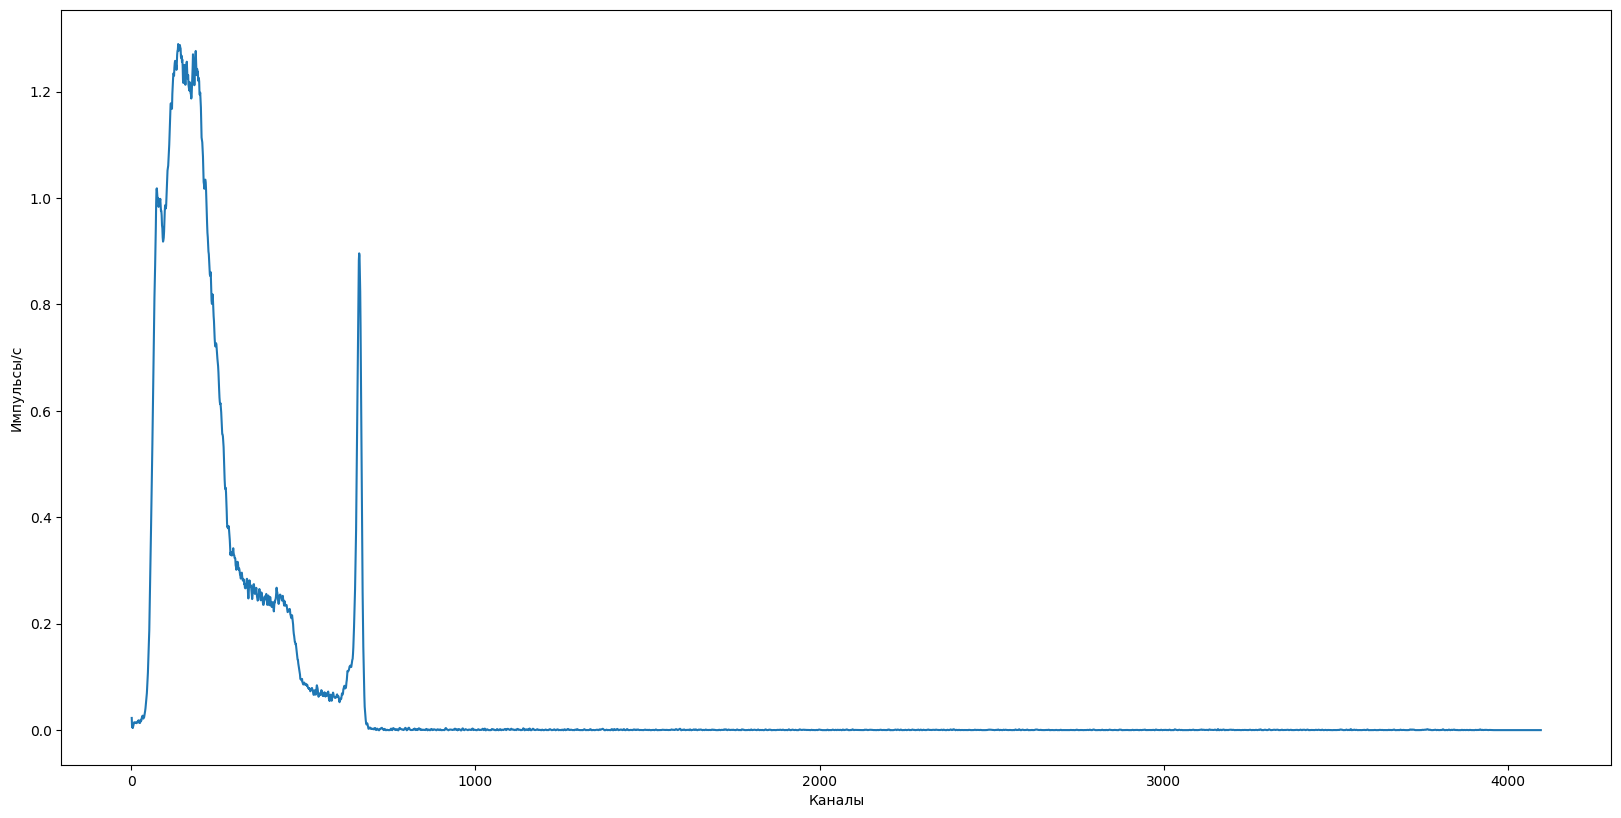

In [33]:
#параболический фильтр по 7-ми точкам 

from scipy.optimize import minimize
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

ch_tmp_7 = []

for p in range(0,3):
    ch_tmp_7.append(chanel[0][p])
    
for p in range (3,4093):
    
    Am = 21
    sgla = (1/Am)*((-2)*chanel[0][p-3] + 3*chanel[0][p-2] + 6*chanel[0][p-1] + 7*chanel[0][p] + 6*chanel[0][p+1] + 3*chanel[0][p+2] - 2*chanel[0][p+3])
    ch_tmp_7.append(sgla)
    
for p in range (4093,4096):
    ch_tmp_7.append(chanel[0][p])
        
    
fig=plt.figure(figsize=(20,10), dpi=100)
plt.plot(np.arange(1,4097,1), ch_tmp_7)
plt.xlabel('Каналы')
plt.ylabel('Импульсы/c')
fig.savefig('after_filter_7', fmt='png')

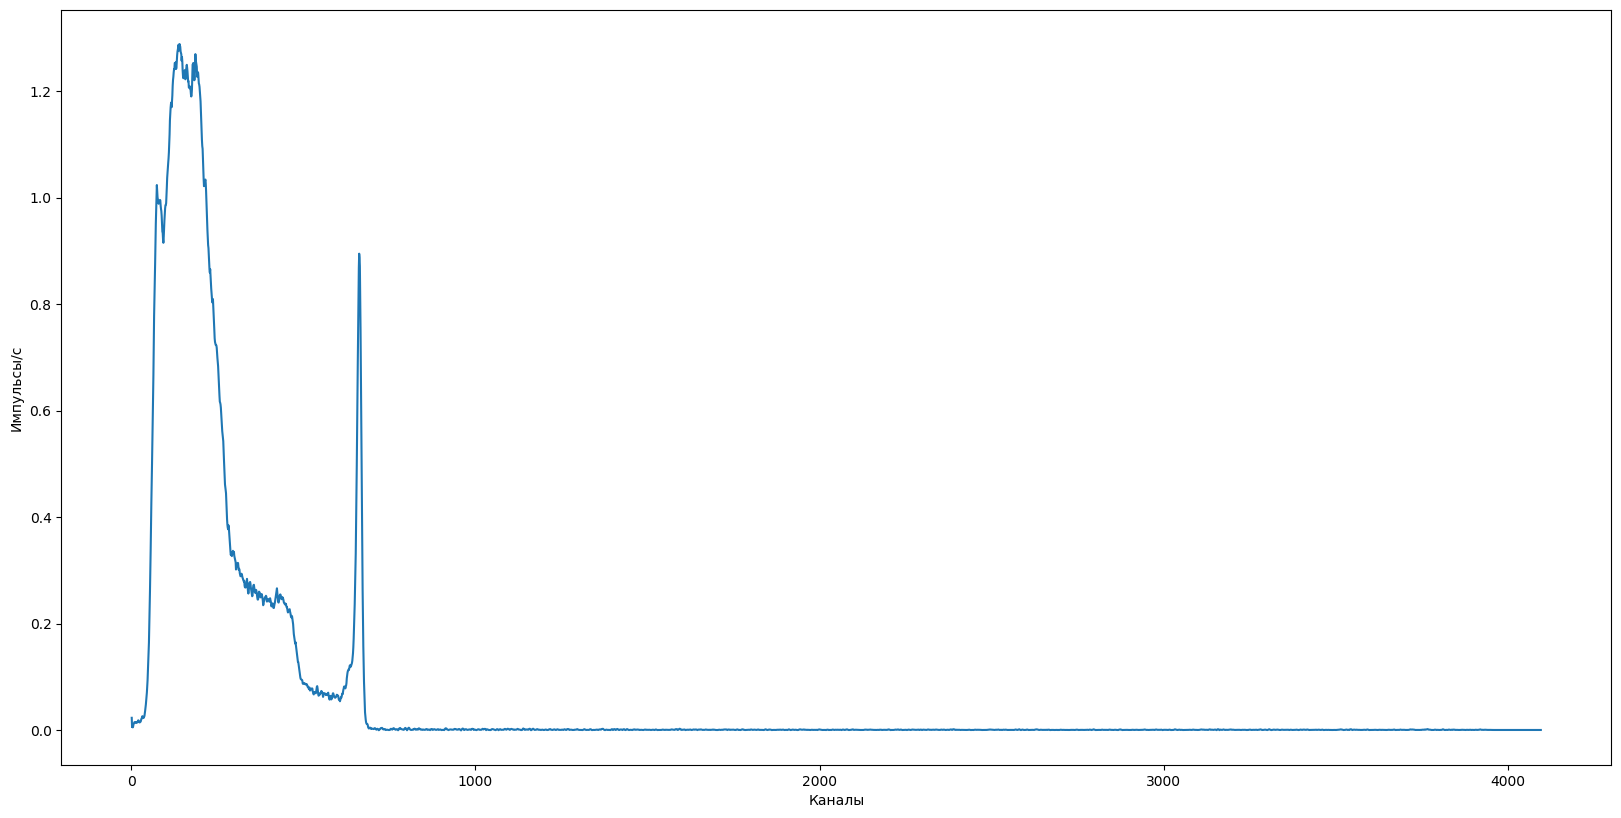

In [34]:
#параболический фильтр по 9-ти точкам 

from scipy.optimize import minimize
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

ch_tmp_9 = []

for p in range(0,4):
    ch_tmp_9.append(chanel[0][p])
    
for p in range (4,4092):
    
    Am = 231
    sgla = (1/Am)*((-21)*chanel[0][p-4] + 14*chanel[0][p-3] + 39*chanel[0][p-2] + 54*chanel[0][p-1] + 59*chanel[0][p] + 54*chanel[0][p+1] + 39*chanel[0][p+2] + 14*chanel[0][p+3] - 21*chanel[0][p+4])
    ch_tmp_9.append(sgla)
    
for p in range (4092,4096):
    ch_tmp_9.append(chanel[0][p])

    
fig=plt.figure(figsize=(20,10), dpi=100)
plt.plot(np.arange(1,4097,1), ch_tmp_9)
plt.xlabel('Каналы')
plt.ylabel('Импульсы/c')
fig.savefig('after_filter_9', fmt='png')